# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
# <a href=https://www.ramp.studio/problems/covertype>RAMP</a> on predicting forest type

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

We can use the RAMP utilities to load the public train and test sets.

In [35]:
import problem

`get_train_data` loads the training data and returns an `pandas` object (input) and a `np.array` object (output).

In [36]:
X_train, y_train = problem.get_train_data()

In [37]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.699350,0.461111,0.212121,0.399427,0.351421,0.749473,0.909449,0.960630,0.551181,0.220828,...,0,0,0,0,0,0,0,0,0,0
1,0.572286,0.986111,0.378788,0.474588,0.195090,0.101869,0.669291,0.732283,0.578740,0.171476,...,0,0,0,0,0,0,0,0,0,0
2,0.676338,0.905556,0.166667,0.107373,0.258398,0.005901,0.763780,0.897638,0.685039,0.235745,...,0,0,0,0,0,0,0,0,0,0
3,0.634317,0.388889,0.545455,0.460988,0.541344,0.142616,0.968504,0.803150,0.208661,0.370556,...,0,0,0,0,0,0,0,0,0,0
4,0.700850,0.650000,0.151515,0.215462,0.266150,0.571730,0.799213,0.980315,0.720472,0.324969,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y_train[:5]

array([1, 1, 1, 1, 7])

Thus, for each entry in in `X_train`, we get the label of a cover tree in `y_train`. We can quickly get some statisics regarding the data we are dealing with.

In [39]:
X_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,...,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000,371847.000000
mean,0.550695,0.432802,0.213845,0.192955,0.283623,0.330437,0.834993,0.879157,0.561321,0.275775,...,0.044373,0.090981,0.077666,0.002816,0.003313,0.000191,0.000508,0.026750,0.024179,0.015127
std,0.140043,0.311168,0.113667,0.152040,0.075393,0.219138,0.105483,0.077961,0.150783,0.184210,...,0.205923,0.287582,0.267646,0.052988,0.057465,0.013817,0.022539,0.161353,0.153606,0.122059
min,0.000500,0.000000,0.000000,0.000000,0.009044,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475738,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280877,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652826,0.725000,0.272727,0.274875,0.312661,0.467894,0.909449,0.933071,0.661417,0.355082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999861,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can get additional information using the `info()` function.

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371847 entries, 0 to 371846
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           371847 non-null  float64
 1   Aspect                              371847 non-null  float64
 2   Slope                               371847 non-null  float64
 3   Horizontal_Distance_To_Hydrology    371847 non-null  float64
 4   Vertical_Distance_To_Hydrology      371847 non-null  float64
 5   Horizontal_Distance_To_Roadways     371847 non-null  float64
 6   Hillshade_9am                       371847 non-null  float64
 7   Hillshade_Noon                      371847 non-null  float64
 8   Hillshade_3pm                       371847 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  371847 non-null  float64
 10  Wilderness_Area1                    371847 non-null  int64  
 11  Wilderness_Area2          

For later analysis, we will work on a subset of data to speed-up the analysis.

In [41]:
from sklearn.model_selection import train_test_split

X_subset, _, y_subset, _ = train_test_split(
    X_train, y_train, train_size=1/1000,
    stratify=y_train, random_state=42
)

We can check to the class distribution to check if we are dealing with an imbalanced datasets. This is always useful when we will assess the performance of our predictive model.

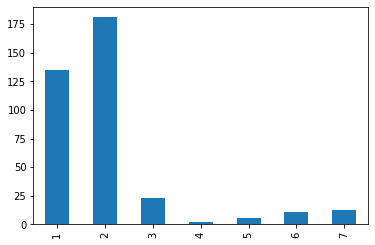

In [42]:
_ = pd.Series(y_subset).value_counts().sort_index().plot(kind="bar")

We see that the first and second classes are dominannt which is something which we need to take into account.

We can look a the feature interaction between pair of feature to see if we can get intuition to derive some rules that a machine-learning predictive model could come with.

In [43]:
df = X_subset.copy()
df['Cover_Type'] = y_subset

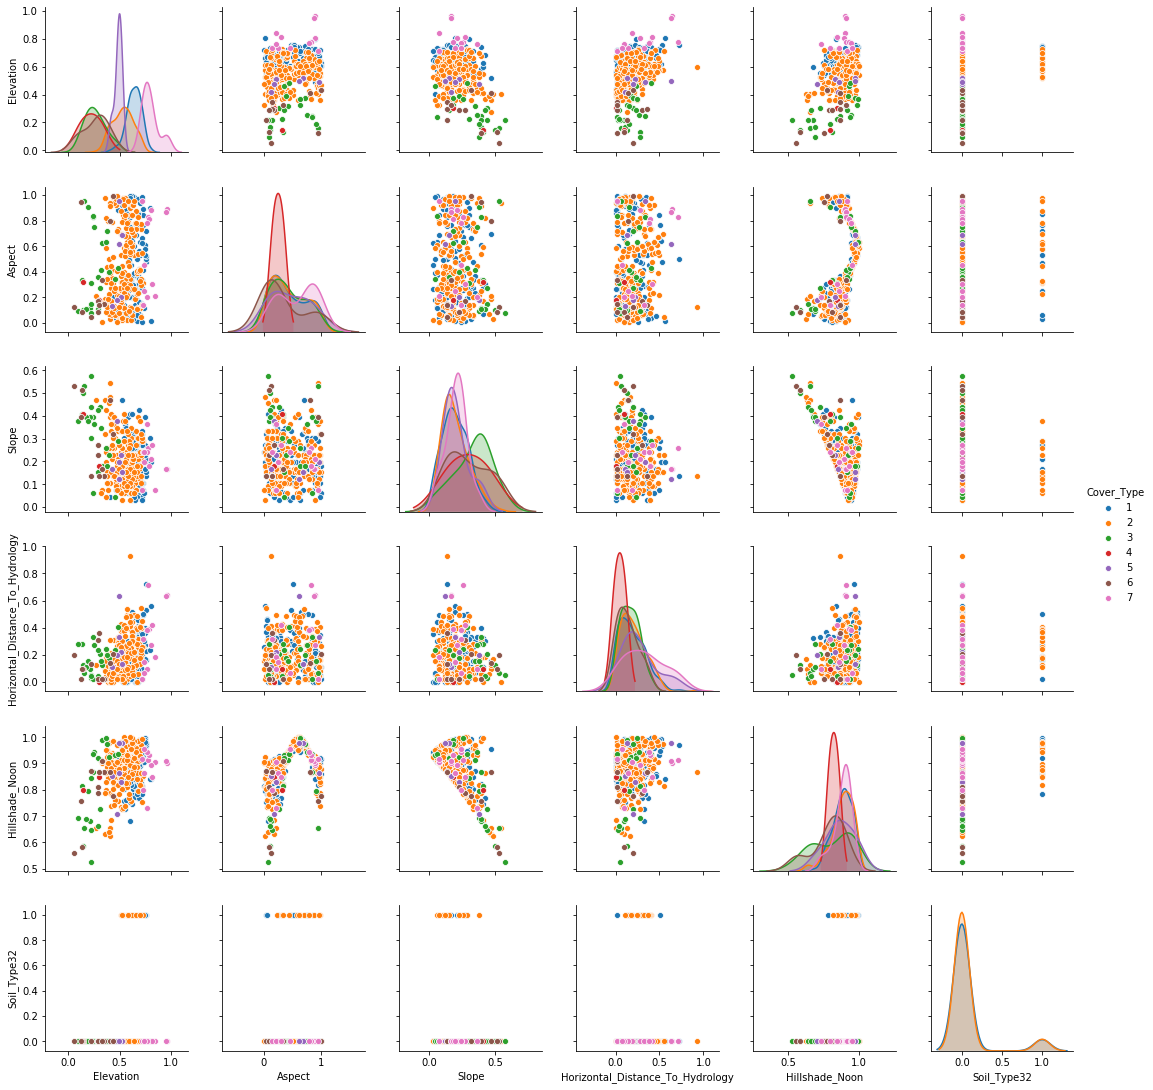

In [44]:
features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Hillshade_Noon', 'Soil_Type32',
    'Cover_Type',
]
_ = sns.pairplot(
    df[features], hue="Cover_Type"
)

If we focus on the interation between `Horizontal_Distance_To_Hydrology` and `Elevation`. Looking at this interaction, we can see that the cover type is linearly dependant with the elevation.

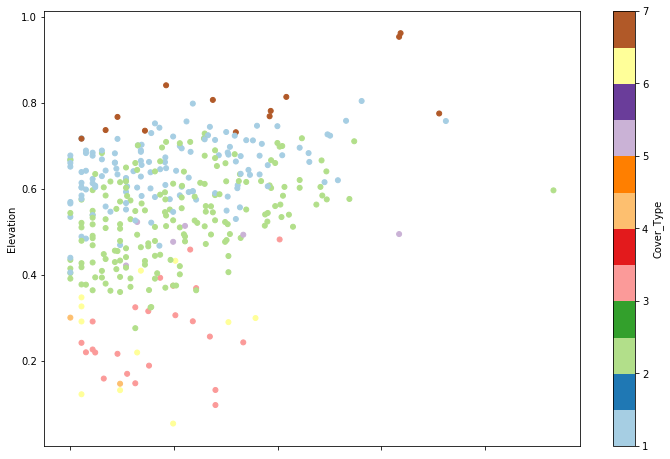

In [45]:
_ = df.plot(
    kind='scatter', x='Horizontal_Distance_To_Hydrology',
    y='Elevation', c='Cover_Type', s=25, cmap=plt.cm.Paired,
    figsize=(12, 8)
)

### A linear regressor baseline

In [46]:
X_train, y_train = X_subset, y_subset

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0
)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

clf = make_pipeline(
    StandardScaler(), LogisticRegression()
)

scores = cross_val_score(
    clf, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores))
)

Accuracy: 0.6215 +/- 0.0463


## Random Forests

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=10, max_depth=10, max_features=10,
    n_jobs=-1, random_state=42
)

scores = cross_val_score(
    clf, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores))
)

Accuracy: 0.6282 +/- 0.0561


## Variable permutation importances

We can now train a model and check which feature are chosen and the most discriminative for our problem.

In [50]:
from sklearn.inspection import permutation_importance

clf.fit(X_train, y_train)
feature_importances = permutation_importance(
    clf, X_val, y_val, n_repeats=3
)

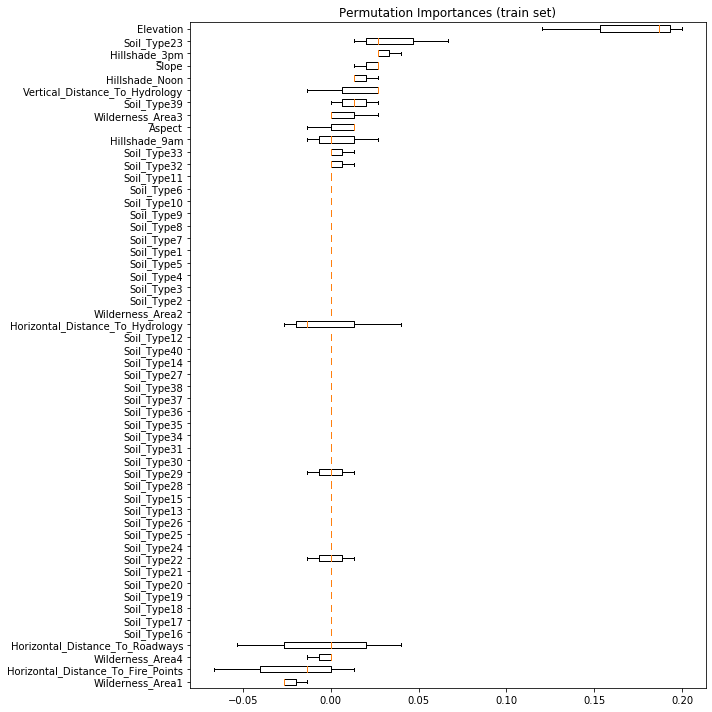

In [51]:
sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_val.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

As we observed, the random-forest predictive model picked-up the `Elevation` feature as the most important model.

## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).